<a href="https://colab.research.google.com/github/soyebganja/NLP-Practice-Projects/blob/main/exercise/word_vectors_spacy_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **NLP Text Classification Using Spacy Word Embeddings**
**Problem Statement**

*   Fake news refers to misinformation or disinformation in the country which is spread through word of mouth and more recently through digital communication such as What's app messages, social media posts, etc.
*   Fake news spreads faster than real news and creates problems and fear among groups and in society.
*   We are going to address these problems using classical NLP techniques and going to classify whether a given message/ text is **Real or Fake Message**.
*   We will use **glove embeddings** from spacy which is trained on massive wikipedia dataset to pre-process and text vectorization and apply different classification algorithms.   

**Dataset**

Credits: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

*   This data consists of two columns. - Text - label
*   Text is the statements or messages regarding a particular event/situation.
*   label feature tells whether the given text is Fake or Real.
*   As there are only 2 classes, this problem comes under the **Binary Classification**.

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('Fake_Real_Data.csv', engine='python')

In [4]:
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [5]:
df.label.value_counts()

,count
label,
Fake,5000
Real,4900


From the above, we can see that almost the labels(classes) occured equal number of times and balanced. There is no problem of class imbalance and hence no need to apply any balancing techniques like undersampling, oversampling etc.

In [6]:
df["label_num"] = df.label.map({"Real": 1, "Fake": 0})
df.head()

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


**Get spacy word vectors and store them in a pandas dataframe**

In [8]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 3.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [9]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [13]:
doc = nlp("Top Trump Surrogate BRUTALLY Stabs Hi")
doc.vector.shape

(300,)

In [15]:
df["vector"] = df.Text.apply(lambda x: nlp(x).vector)

In [16]:
df.head()

,Text,label,label_num,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[-0.103623025, 0.17802684, -0.11873861, -0.034..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[-0.0063406364, 0.16712041, -0.06661373, 0.017..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[-0.122753024, 0.17192385, -0.024732638, -0.06..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[-0.027337318, 0.12501417, -0.0073965387, -0.0..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-0.032708026, 0.093958504, -0.03287002, -0.00..."


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.label_num,
    test_size=0.2,
    random_state=42
)

In [19]:
import numpy as np

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

clf = RandomForestClassifier()
clf.fit(X_train_2d, y_train)
preds = clf.predict(X_test_2d)

print(classification_report(y_test, preds))
print(accuracy_score(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       973
           1       0.98      0.98      0.98      1007

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980

0.9787878787878788


In [21]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train_2d, y_train)
preds = clf.predict(X_test_2d)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       973
           1       0.99      0.99      0.99      1007

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



In [26]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
clf.fit(X_train_2d, y_train)
preds = clf.predict(X_test_2d)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       973
           1       0.97      0.99      0.98      1007

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



In [27]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train_2d, y_train)
preds = clf.predict(X_test_2d)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       973
           1       0.99      1.00      0.99      1007

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



**Confusion Matrix**

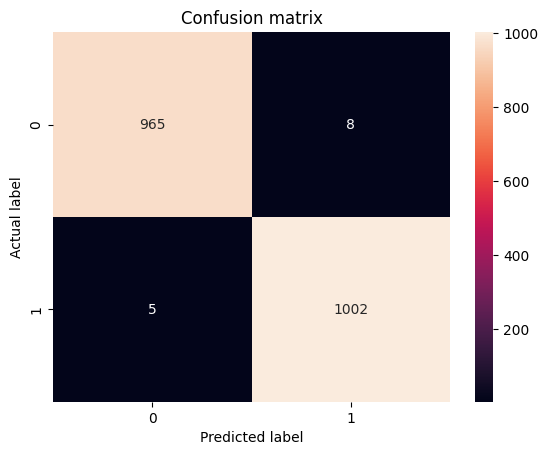

In [29]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(pd.DataFrame(confusion_matrix(y_test, preds)), annot=True, fmt='d')
plt.title("Confusion matrix")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()